In [229]:
#importing all libraries and data needed for this analysis
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
d1 = pd.read_excel('CapstoneData.xlsx')


In [230]:
d1.head()


,Year,AGRICULTURE,Crops,Livestock,Forestry,Fishing,INDUSTRY,MiningQuarrying,CrudePetroleumNaturalGas,CoalMining,...,RealEstate,ProfessionalScientificTechnicalServ.,AdministrativeSupportServices,PublicAdministration,Education,HumanHealthSocialServices,OtherServices,ProductGDP,NetTaxes,PriceGDP
0,1981,17.05,12.82,2.53,1.16,0.55,54.67,13.12,5.92,5.33,...,5.24,2.59,0.02,9.09,3.40,1.62,1.08,137.93,1.38,139.31
1,1982,20.13,14.32,3.96,1.17,0.67,51.88,9.13,4.93,2.57,...,5.57,3.92,0.03,11.54,4.31,2.05,1.14,147.57,1.48,149.05
2,1983,23.80,16.35,5.19,1.27,0.99,54.16,8.00,4.28,2.43,...,6.60,3.73,0.03,12.11,4.53,2.16,1.30,157.18,1.57,158.75
3,1984,30.37,21.50,6.62,1.38,0.87,50.33,9.89,5.24,3.50,...,6.21,3.87,0.03,12.74,4.76,2.27,1.47,164.21,1.64,165.85
4,1985,34.24,25.07,7.16,1.47,0.54,62.86,14.00,6.59,6.54,...,6.58,4.33,0.03,13.39,5.00,2.38,1.38,185.98,1.85,187.83


In [231]:
#finding percentage change over the years in some selected sectors
d1['Year_new'] = d1['Year']
d1['AGRIC_diff'] = d1['AGRICULTURE'].pct_change()
d1['Industry_diff'] = d1['INDUSTRY'].pct_change()
d1['Mining_diff'] = d1['MiningQuarrying'].pct_change()
d1['ProductGDP_diff'] = d1['ProductGDP'].pct_change()
d1['NetTaxes_diff'] = d1['NetTaxes'].pct_change()
d1['HumanHealth_diff'] = d1['HumanHealthSocialServices'].pct_change()
d1['PriceGDP_diff'] = d1['PriceGDP'].pct_change()
d1['Crude_diff'] = d1['CrudePetroleumNaturalGas'].pct_change()
d1['Education_diff'] = d1['Education'].pct_change()
d1['Manufacturing_diff'] = d1['Manufacturing'].pct_change()
d1['Services_diff'] = d1['SERVICES'].pct_change()
d1['Trade_diff'] = d1['Trade'].pct_change()
d1['AccommodationFood_diff'] = d1['AccomadationFood'].pct_change()
d1['AirTransport_diff'] = d1['AirTransport'].pct_change()
d1['OilRefining_diff'] = d1['OilRefining'].pct_change()
d1['InfoComm_diff'] = d1['InformationCommunication'].pct_change()
d1['FinancialInsurance_diff'] = d1['FinancialInsurance'].pct_change()
d1['RealEstate_diff'] = d1['RealEstate'].pct_change()
d1['ArtsEntertainmentRecreation_diff'] = d1['ArtsEntertainmentRecreation'].pct_change()
d1['ChemicalPharmaceuticals_diff'] = d1['ChemicalPharmaceuticals'].pct_change()
d1['RoadTransport_diff'] = d1['RoadTransport'].pct_change()
d1['ChemicalPharmaceuticals_diff'] = d1['ChemicalPharmaceuticals'].pct_change()
d1['FoodBeverageTobacco_diff'] = d1['FoodBeverageTobacco'].pct_change()


In [232]:
d2 = d1[d1.columns[58:]] #extracting a new data set consisting of percentage change over the years in various sectors from the original data
d3 = d2.dropna()
d3.head(5)


,Year_new,AGRIC_diff,Industry_diff,Mining_diff,ProductGDP_diff,NetTaxes_diff,HumanHealth_diff,PriceGDP_diff,Crude_diff,Education_diff,...,AccommodationFood_diff,AirTransport_diff,OilRefining_diff,InfoComm_diff,FinancialInsurance_diff,RealEstate_diff,ArtsEntertainmentRecreation_diff,ChemicalPharmaceuticals_diff,RoadTransport_diff,FoodBeverageTobacco_diff
1,1982,0.180645,-0.051033,-0.304116,0.069891,0.072464,0.265432,0.069916,-0.167230,0.267647,...,0.023810,0.318841,0.000000,0.062615,0.298065,0.062977,0.00,0.050000,-0.180077,0.063691
2,1983,0.182315,0.043948,-0.123768,0.065122,0.060811,0.053659,0.065079,-0.131846,0.051044,...,0.034884,-0.010989,-0.333333,-0.010976,-0.122266,0.184919,0.00,0.142857,-0.023364,0.139713
3,1984,0.276050,-0.070716,0.236250,0.044726,0.044586,0.050926,0.044724,0.224299,0.050773,...,0.191011,0.044444,0.000000,0.038551,0.220838,-0.059091,0.25,-0.125000,0.119617,-0.122137
4,1985,0.127428,0.248957,0.415571,0.132574,0.128049,0.048458,0.132529,0.257634,0.050420,...,-0.037736,0.170213,0.833333,0.003375,0.097403,0.059581,0.00,0.285714,0.452991,0.265985
5,1986,0.042640,0.034839,-0.112143,0.054791,0.054054,0.050420,0.054784,-0.159332,0.050000,...,0.039216,-0.072727,-0.545455,0.054372,0.200338,0.103343,0.00,0.000000,0.047059,0.009293


In [233]:
d4 = d3.describe().T.round(2) #stastical summary of the change over the years


In [234]:
d4.head() #overview of statistical summary of percentage change over the years


,count,mean,std,min,25%,50%,75%,max
Year_new,39.0,2001.00,11.40,1982.00,1991.50,2001.00,2010.50,2020.00
AGRIC_diff,39.0,0.23,0.22,0.04,0.10,0.16,0.26,1.11
Industry_diff,39.0,0.21,0.23,-0.14,0.05,0.20,0.31,1.04
Mining_diff,39.0,0.27,0.54,-0.37,-0.08,0.21,0.46,2.37
ProductGDP_diff,39.0,0.20,0.15,0.04,0.10,0.15,0.29,0.75


In [235]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=d3.index, y=d3['RealEstate_diff'],
mode='lines', name = 'RealEstate'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['ArtsEntertainmentRecreation_diff'],
mode='lines', name = 'ArtsEntertainmentRecreation'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['ChemicalPharmaceuticals_diff'],
mode='lines', name = 'ChemicalPharmaceuticals'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['OilRefining_diff'],
mode='lines', name = 'Oilrefining'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['ProductGDP_diff'],
mode='lines', name = 'ProductGDP'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['Education_diff'],
mode = 'lines', name = 'Education'))


In [236]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=d3.index, y=d3['FinancialInsurance_diff'],
mode='lines', name = 'FinancialInsurance'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['Mining_diff'],
mode='lines', name = 'mining'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['NetTaxes_diff'],
mode='lines', name = 'Nettaxes'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['PriceGDP_diff'],
mode='lines', name = 'PriceGDP'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['InfoComm_diff'],
mode='lines', name = 'InformatioCommunication'))


In [237]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=d3.index, y=d3['Industry_diff'],
mode='lines', name = 'Industry'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['Crude_diff'],
mode='lines', name = 'crudeoil'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['Trade_diff'],
mode='lines', name = 'Trade'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['FoodBeverageTobacco_diff'],
mode='lines', name = 'FoodBeverageTobacco'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['AccommodationFood_diff'],
mode = 'lines', name = 'Accommodation&Food'))

In [238]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=d3.index, y=d3['AGRIC_diff'],
mode='lines', name = 'Agriculture'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['HumanHealth_diff'],
mode='lines', name = 'Healthcare'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['Services_diff'],
mode='lines', name = 'Services'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['AirTransport_diff'],
mode='lines', name = 'AirTransport'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['RoadTransport_diff'],
mode='lines', name = 'RoadTransport'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['ProductGDP_diff'],
mode = 'lines', name = 'ProductGDP'))

In [239]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=d3.index, y=d3['AGRIC_diff'],
mode='lines', name = 'Agriculture'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['HumanHealth_diff'],
mode='lines', name = 'Healthcare'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['Services_diff'],
mode='lines', name = 'Services'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['AirTransport_diff'],
mode='lines', name = 'AirTransport'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['ProductGDP_diff'],
mode = 'lines', name = 'ProductGDP'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['Industry_diff'],
mode='lines', name = 'Industry'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['Crude_diff'],
mode='lines', name = 'crudeoil'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['Trade_diff'],
mode='lines', name = 'Trade'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['FoodBeverageTobacco_diff'],
mode='lines', name = 'FoodBeverageTobacco'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['RealEstate_diff'],
mode='lines', name = 'RealEstate'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['ArtsEntertainmentRecreation_diff'],
mode='lines', name = 'ArtsEntertainmentRecreation'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['ChemicalPharmaceuticals_diff'],
mode='lines', name = 'ChemicalPharmaceuticals'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['OilRefining_diff'],
mode='lines', name = 'Oilrefining'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['Education_diff'],
mode = 'lines', name = 'Education'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['FinancialInsurance_diff'],
mode='lines', name = 'FinancialInsurance'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['Mining_diff'],
mode='lines', name = 'mining'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['NetTaxes_diff'],
mode='lines', name = 'Nettaxes'))
fig.add_trace(go.Scatter(x=d3.index, y=d3['InfoComm_diff'],
mode='lines', name = 'InformatioCommunication'))


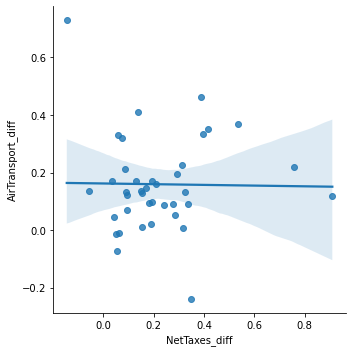

In [240]:
#a regression plot of cpercentage change of air transport as it contributes to nettaxes
sns.lmplot(data = d3, y = 'AirTransport_diff', x = 'NetTaxes_diff',
           fit_reg=True)


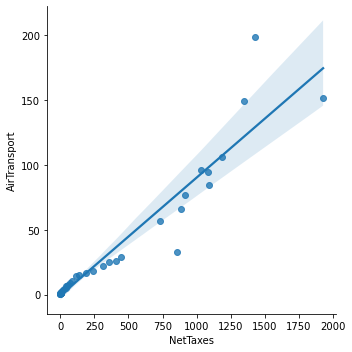

In [241]:
#a regression plot of airtrnsport to nettaxes
sns.lmplot(data = d1, y = 'AirTransport', x = 'NetTaxes',
           fit_reg=True)


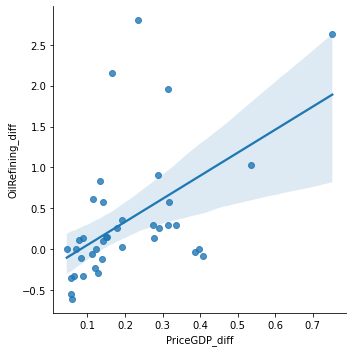

In [242]:
#a regression plot of oil refining and price-gdp
sns.lmplot(data = d1, y = 'OilRefining_diff', x = 'PriceGDP_diff',
           fit_reg=True)


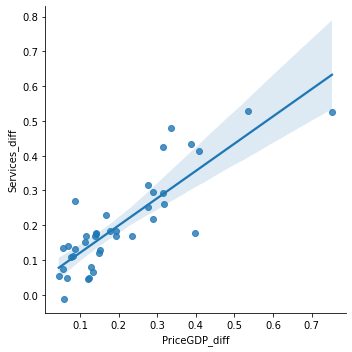

In [247]:
sns.lmplot(data = d1, y = 'Services_diff', x = 'PriceGDP_diff',
           fit_reg=True)

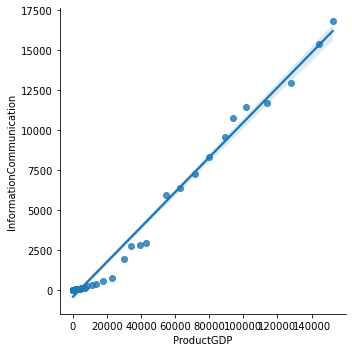

In [248]:
sns.lmplot(data = d1, y = 'InformationCommunication', x = 'ProductGDP',
           fit_reg=True)

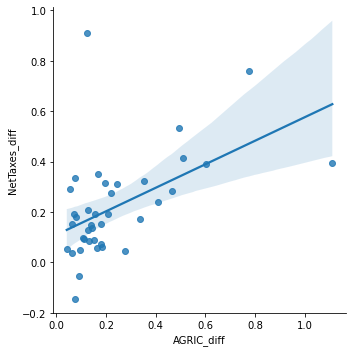

In [251]:
sns.lmplot(data = d3, x = 'AGRIC_diff', y = 'NetTaxes_diff',
           fit_reg=True)

In [252]:
d3.describe()

,Year_new,AGRIC_diff,Industry_diff,Mining_diff,ProductGDP_diff,NetTaxes_diff,HumanHealth_diff,PriceGDP_diff,Crude_diff,Education_diff,...,AccommodationFood_diff,AirTransport_diff,OilRefining_diff,InfoComm_diff,FinancialInsurance_diff,RealEstate_diff,ArtsEntertainmentRecreation_diff,ChemicalPharmaceuticals_diff,RoadTransport_diff,FoodBeverageTobacco_diff
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,...,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,2001.000000,0.233650,0.205647,0.274293,0.204966,0.218609,0.198838,0.205057,0.316203,0.210145,...,0.239356,0.159297,0.346540,0.216592,0.199090,0.238073,0.291665,0.239278,0.211600,0.176218
std,11.401754,0.220207,0.226070,0.536178,0.149480,0.201136,0.279362,0.149578,0.616508,0.288421,...,0.353079,0.166435,0.794558,0.274971,0.240848,0.330444,0.366329,0.217569,0.248275,0.167180
min,1982.000000,0.042640,-0.136156,-0.372218,0.044726,-0.144827,0.030021,0.044724,-0.377068,-0.088195,...,-0.041303,-0.239503,-0.611130,-0.010976,-0.229160,-0.059091,-0.053501,-0.125000,-0.180077,-0.122137
25%,1991.500000,0.101516,0.054293,-0.084898,0.099757,0.087720,0.076103,0.100224,-0.092538,0.071183,...,0.060003,0.079439,-0.073350,0.070831,0.099741,0.079111,0.100902,0.083852,0.082449,0.084737
50%,2001.000000,0.155772,0.199574,0.205527,0.152213,0.179727,0.125370,0.148623,0.162590,0.140082,...,0.181489,0.133981,0.133976,0.150369,0.155456,0.139741,0.225572,0.167939,0.147929,0.144225
75%,2010.500000,0.260778,0.311911,0.461596,0.289090,0.314194,0.178376,0.289100,0.450524,0.194256,...,0.257273,0.214437,0.464266,0.232239,0.272759,0.278907,0.279731,0.356412,0.287142,0.210106
max,2020.000000,1.109496,1.044985,2.371783,0.752678,0.909099,1.577495,0.752746,2.498424,1.576340,...,2.085934,0.729109,2.800000,1.471227,1.234474,1.942124,1.658584,0.681303,1.201316,0.669882


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Figure size 432x720 with 0 Axes>

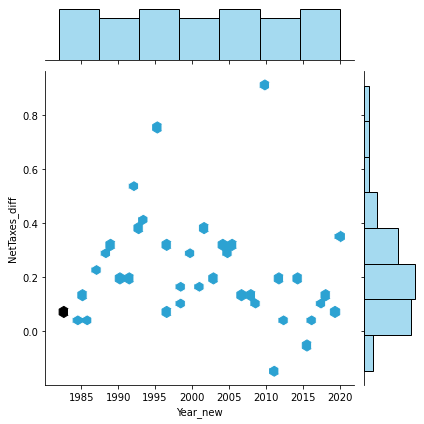

In [253]:
plt.figure(figsize = (6,10))
sns.jointplot(d3.Year_new,d3.NetTaxes_diff,kind='hex',gridsize=30,color='skyblue')

In [254]:
d4 = d3.set_index('Year_new')

In [255]:
corrData = d4.corr()

In [256]:
d3.describe().T.round(2) #stastical summary of the change over the years

,count,mean,std,min,25%,50%,75%,max
Year_new,39.0,2001.00,11.40,1982.00,1991.50,2001.00,2010.50,2020.00
AGRIC_diff,39.0,0.23,0.22,0.04,0.10,0.16,0.26,1.11
Industry_diff,39.0,0.21,0.23,-0.14,0.05,0.20,0.31,1.04
Mining_diff,39.0,0.27,0.54,-0.37,-0.08,0.21,0.46,2.37
ProductGDP_diff,39.0,0.20,0.15,0.04,0.10,0.15,0.29,0.75
NetTaxes_diff,39.0,0.22,0.20,-0.14,0.09,0.18,0.31,0.91
HumanHealth_diff,39.0,0.20,0.28,0.03,0.08,0.13,0.18,1.58
PriceGDP_diff,39.0,0.21,0.15,0.04,0.10,0.15,0.29,0.75
Crude_diff,39.0,0.32,0.62,-0.38,-0.09,0.16,0.45,2.50
Education_diff,39.0,0.21,0.29,-0.09,0.07,0.14,0.19,1.58


In [257]:
d4.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
AGRIC_diff,39.0,0.234,0.220,0.043,0.102,0.156,0.261,1.109
Industry_diff,39.0,0.206,0.226,-0.136,0.054,0.200,0.312,1.045
Mining_diff,39.0,0.274,0.536,-0.372,-0.085,0.206,0.462,2.372
ProductGDP_diff,39.0,0.205,0.149,0.045,0.100,0.152,0.289,0.753
NetTaxes_diff,39.0,0.219,0.201,-0.145,0.088,0.180,0.314,0.909
HumanHealth_diff,39.0,0.199,0.279,0.030,0.076,0.125,0.178,1.577
PriceGDP_diff,39.0,0.205,0.150,0.045,0.100,0.149,0.289,0.753
Crude_diff,39.0,0.316,0.617,-0.377,-0.093,0.163,0.451,2.498
Education_diff,39.0,0.210,0.288,-0.088,0.071,0.140,0.194,1.576
Manufacturing_diff,39.0,0.193,0.163,-0.122,0.085,0.164,0.262,0.675


In [258]:
d4.corr().head(5)

,AGRIC_diff,Industry_diff,Mining_diff,ProductGDP_diff,NetTaxes_diff,HumanHealth_diff,PriceGDP_diff,Crude_diff,Education_diff,Manufacturing_diff,...,AccommodationFood_diff,AirTransport_diff,OilRefining_diff,InfoComm_diff,FinancialInsurance_diff,RealEstate_diff,ArtsEntertainmentRecreation_diff,ChemicalPharmaceuticals_diff,RoadTransport_diff,FoodBeverageTobacco_diff
AGRIC_diff,1.000000,0.337308,0.246836,0.707241,0.511939,0.122998,0.706827,0.276978,0.089823,0.501319,...,0.029711,0.287586,0.318227,0.037551,0.277766,0.307461,0.293843,0.281658,0.381696,0.589878
Industry_diff,0.337308,1.000000,0.901384,0.824845,0.707145,0.263597,0.825581,0.834534,0.235378,0.633030,...,0.224105,0.222966,0.501895,0.145606,0.161471,0.335085,0.344657,0.397203,0.439358,0.643274
Mining_diff,0.246836,0.901384,1.000000,0.692188,0.606297,0.213444,0.693045,0.963411,0.196196,0.332166,...,0.058315,0.068500,0.641071,0.098850,0.244200,0.132996,0.219714,0.128635,0.211107,0.353849
ProductGDP_diff,0.707241,0.824845,0.692188,1.000000,0.775552,0.376291,0.999954,0.662995,0.352173,0.698116,...,0.304468,0.315328,0.531652,0.251766,0.355799,0.515591,0.444997,0.428504,0.583866,0.760683
NetTaxes_diff,0.511939,0.707145,0.606297,0.775552,1.000000,0.252157,0.781471,0.569083,0.201084,0.428950,...,0.178231,-0.014927,0.350766,0.436468,0.314340,0.353016,0.138223,0.137744,0.387982,0.505382


<AxesSubplot:>

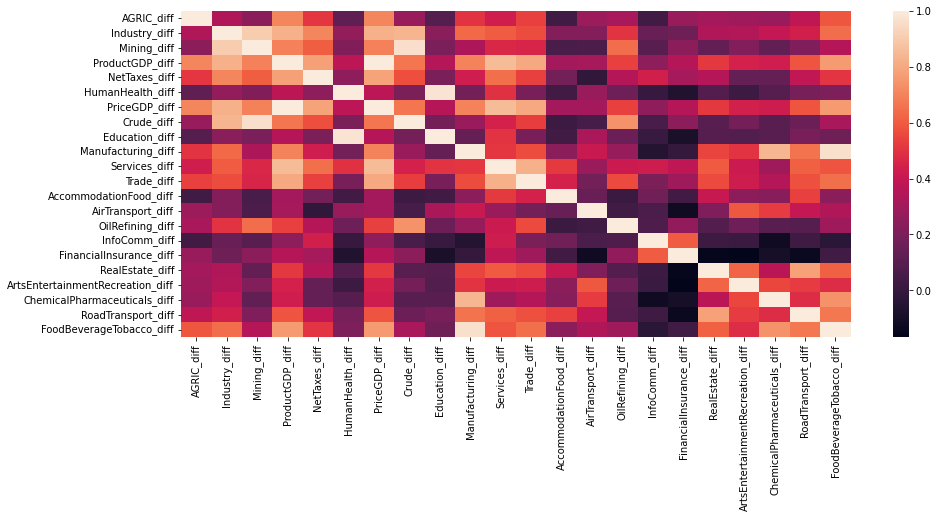

In [259]:
#plotting of correlation of all the variables to each other.
plt.figure(figsize = (15,6))
sns.heatmap(d4.corr())

<AxesSubplot:>

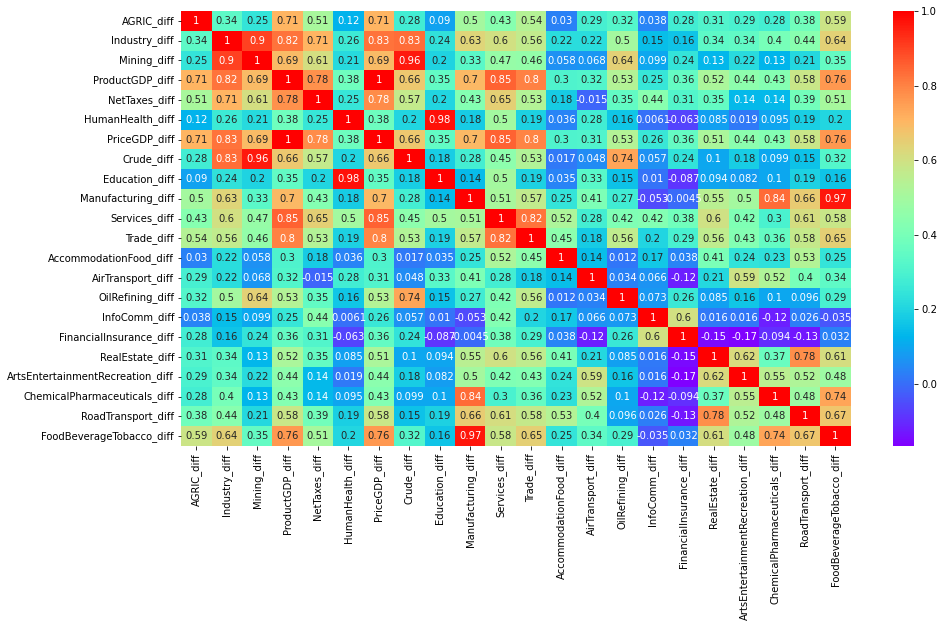

In [260]:
plt.figure(figsize = (15,8))
sns.heatmap(d4.corr(), annot = True, cmap = 'rainbow')

In [261]:
#BUILDING A PREDICTIVE MODEL FOR PRICE GDP
fx = ['AGRICULTURE','INDUSTRY','OilRefining','RealEstate','AirTransport','InformationCommunication',
      'CrudePetroleumNaturalGas', 'Trade', 'MiningQuarrying','Manufacturing','HumanHealthSocialServices', 'PriceGDP']
X = d1.loc[:, fx]
y = d1.loc[:, ['NetTaxes']]

In [262]:
#making an instance for the model
reg = DecisionTreeRegressor(max_depth = 2, random_state = 0)

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [264]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [265]:
 #Predicting multiple observations
reg.predict(X_test)

array([ 22.861875,  22.861875, 297.93    ,  22.861875,  22.861875,
        22.861875, 297.93    ,  22.861875,  22.861875, 297.93    ])

In [266]:
reg.predict(X_train)

array([ 297.93      ,  990.82142857, 1568.99333333,   22.861875  ,
       1568.99333333,  990.82142857,  990.82142857,   22.861875  ,
        990.82142857,   22.861875  ,   22.861875  ,   22.861875  ,
         22.861875  ,   22.861875  ,  990.82142857,   22.861875  ,
        990.82142857,   22.861875  ,  297.93      ,   22.861875  ,
        990.82142857,  297.93      ,   22.861875  ,  297.93      ,
         22.861875  ,   22.861875  ,   22.861875  , 1568.99333333,
         22.861875  ,   22.861875  ])

In [267]:
reg.score(X_test, y_test)

0.47955046040029536

In [268]:
X_test.head()

,AGRICULTURE,INDUSTRY,OilRefining,RealEstate,AirTransport,InformationCommunication,CrudePetroleumNaturalGas,Trade,MiningQuarrying,Manufacturing,HumanHealthSocialServices,PriceGDP
22,4585.93,3525.14,72.27,945.48,15.37,399.23,1588.09,1783.85,1598.74,1635.05,142.86,13556.97
20,2015.42,2328.41,57.43,604.83,10.53,255.20,966.79,1243.26,975.78,1146.68,123.95,8234.49
25,7513.30,7822.11,155.88,2490.71,22.41,1948.34,4044.97,5303.85,4075.35,2689.08,206.59,30375.18
4,34.24,62.86,0.11,6.58,1.10,17.84,6.59,17.77,14.00,39.55,2.38,187.83
10,123.24,218.12,0.99,15.60,1.41,33.20,67.50,80.84,76.78,115.03,4.71,590.06


In [269]:
X_train.head()

,AGRICULTURE,INDUSTRY,OilRefining,RealEstate,AirTransport,InformationCommunication,CrudePetroleumNaturalGas,Trade,MiningQuarrying,Manufacturing,HumanHealthSocialServices,PriceGDP
27,10100.33,9874.38,198.02,3262.54,25.75,2856.35,5270.01,6776.71,5310.95,3263.82,264.21,39954.21
35,21523.51,18641.17,276.59,8340.43,94.50,11479.50,5367.32,20675.86,5469.55,8903.24,745.58,102575.42
37,27371.30,33218.33,210.66,8632.82,149.35,12979.87,13423.87,21918.44,13648.66,12455.53,821.69,129086.91
2,23.80,54.16,0.06,6.60,0.90,17.12,4.28,16.07,8.00,33.49,2.16,158.75
39,37241.61,43530.78,57.86,8678.13,151.05,16808.64,10195.63,21106.38,10851.77,19539.55,951.34,154252.32


In [270]:
y_test.head()

,NetTaxes
22,138.96
20,84.48
25,311.22
4,1.85
10,5.81


In [271]:
y_train.head()

,NetTaxes
27,411.78
35,1085.93
37,1350.08
2,1.57
39,1928.25


[Text(0.5, 0.8333333333333334, 'INDUSTRY <= 13863.745\nsquared_error = 306715.881\nsamples = 30\nvalue = 440.008'),
 Text(0.25, 0.5, 'MiningQuarrying <= 1875.355\nsquared_error = 14570.663\nsamples = 20\nvalue = 77.876'),
 Text(0.125, 0.16666666666666666, 'squared_error = 1030.883\nsamples = 16\nvalue = 22.862'),
 Text(0.375, 0.16666666666666666, 'squared_error = 8199.802\nsamples = 4\nvalue = 297.93'),
 Text(0.75, 0.5, 'HumanHealthSocialServices <= 803.245\nsquared_error = 104166.632\nsamples = 10\nvalue = 1164.273'),
 Text(0.625, 0.16666666666666666, 'squared_error = 20426.841\nsamples = 7\nvalue = 990.821'),
 Text(0.875, 0.16666666666666666, 'squared_error = 65561.55\nsamples = 3\nvalue = 1568.993')]

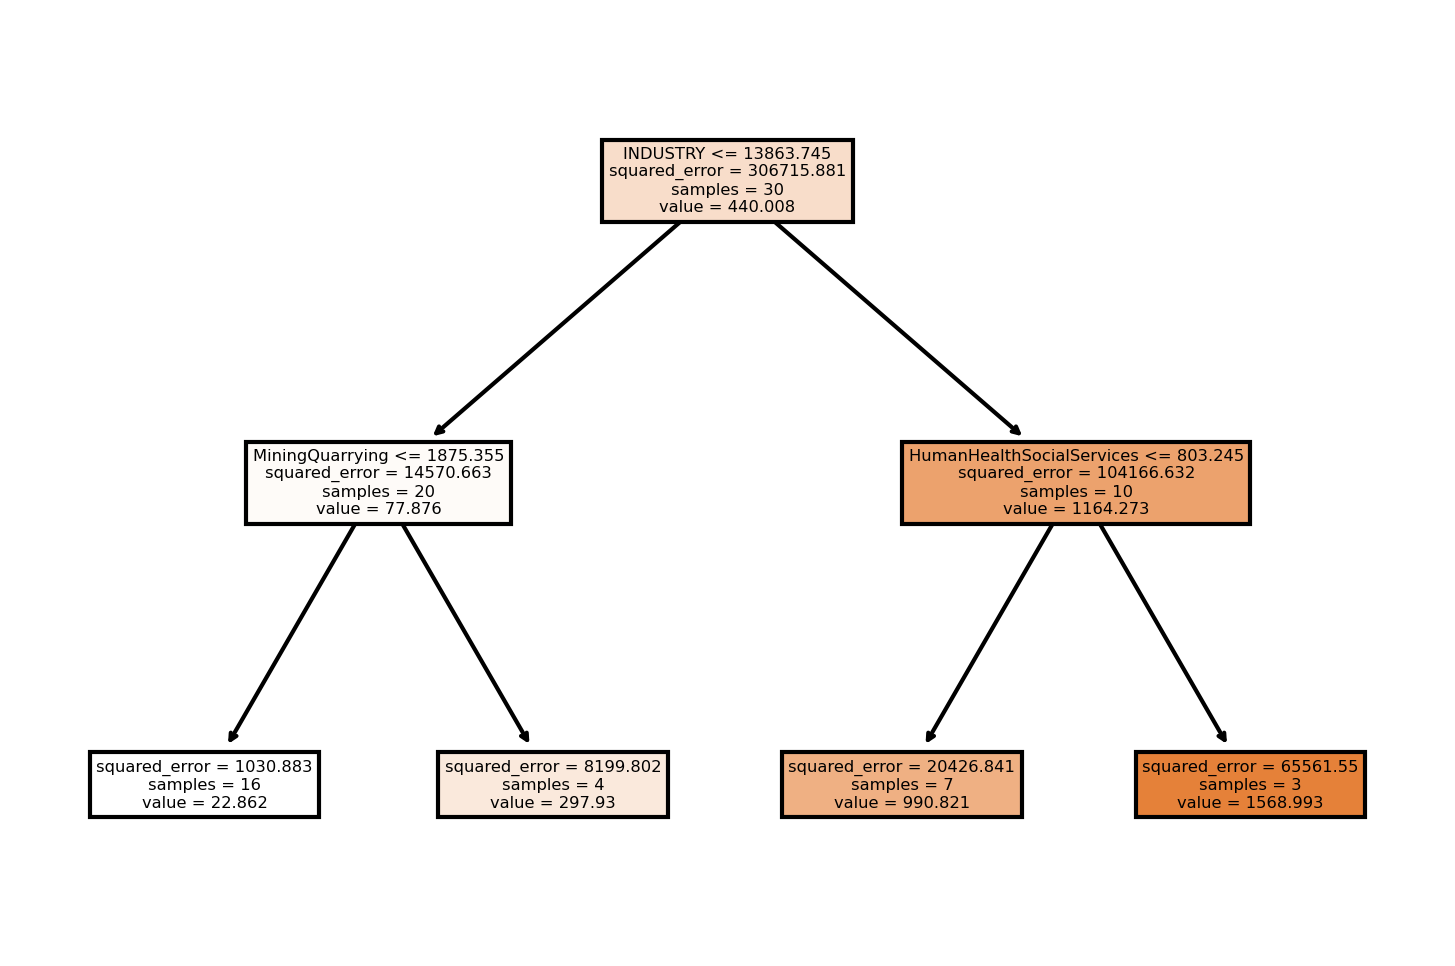

In [272]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, dpi=300)
tree.plot_tree(reg,
              feature_names = fx,
              filled = True)

In [273]:
#The code below outputs the accuracy for decision trees with different values for max_depth.
max_depth_range = list(range(1, 22))
# List to store the average RMSE for each value of max_depth:
r2_list = []
for depth in max_depth_range:
    reg = DecisionTreeRegressor(max_depth = depth,
                            random_state = 0)
    reg.fit(X_train, y_train)   
    
    score = reg.score(X_test, y_test)
    r2_list.append(score)

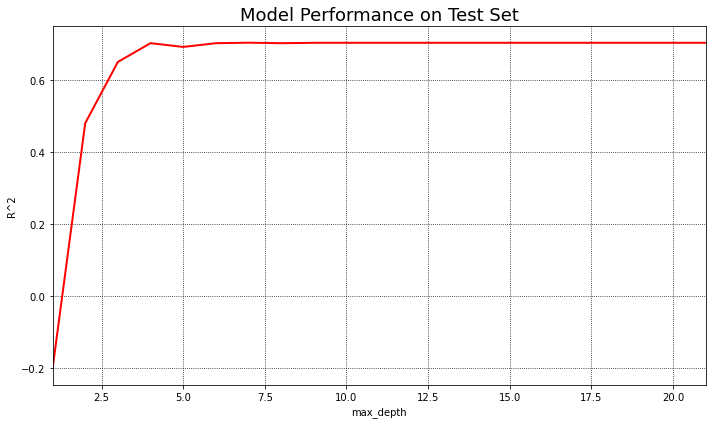

In [274]:
#The graph below shows that the best model R² is when the hyperparameter max_depth is equal to 5.
#This process of selecting the best model (max_depth = 3 and above in this case )is called model selection.

fig, ax = plt.subplots(nrows = 1, ncols = 1,
                       figsize = (10,6),
                       facecolor = 'white');
ax.plot(max_depth_range,
       r2_list,
       lw=2,
       color='r')
ax.set_xlim([1, max(max_depth_range)])
ax.grid(True,
       axis = 'both',
       zorder = 0,
       linestyle = ':',
       color = 'k')
ax.tick_params(labelsize = 10)
ax.set_xlabel('max_depth', fontsize = 10)
ax.set_ylabel('R^2', fontsize = 10)
ax.set_title('Model Performance on Test Set', fontsize = 18)
fig.tight_layout()

In [275]:
V = pd.concat([X_train, X_test], ignore_index=True)

In [276]:
V1 = pd.concat([y_train, y_test], ignore_index=True)

In [277]:
V2 = pd.concat([V, V1], axis = 1)

In [278]:
V2

,AGRICULTURE,INDUSTRY,OilRefining,RealEstate,AirTransport,InformationCommunication,CrudePetroleumNaturalGas,Trade,MiningQuarrying,Manufacturing,HumanHealthSocialServices,PriceGDP,NetTaxes
0,10100.33,9874.38,198.02,3262.54,25.75,2856.35,5270.01,6776.71,5310.95,3263.82,264.21,39954.21,411.78
1,21523.51,18641.17,276.59,8340.43,94.50,11479.50,5367.32,20675.86,5469.55,8903.24,745.58,102575.42,1085.93
2,27371.30,33218.33,210.66,8632.82,149.35,12979.87,13423.87,21918.44,13648.66,12455.53,821.69,129086.91,1350.08
3,23.80,54.16,0.06,6.60,0.90,17.12,4.28,16.07,8.00,33.49,2.16,158.75,1.57
4,37241.61,43530.78,57.86,8678.13,151.05,16808.64,10195.63,21106.38,10851.77,19539.55,951.34,154252.32,1928.25
5,14037.83,17853.11,291.75,4584.96,56.49,6379.56,11039.41,10325.57,11098.98,4527.45,387.19,63713.36,732.96
6,19636.97,19188.58,248.02,8187.55,95.74,10781.08,5990.42,18028.90,6100.01,8973.77,682.70,95177.74,1032.78
7,1211.46,1557.54,9.09,219.71,6.37,91.37,619.22,758.97,624.63,848.33,30.36,4418.71,44.21
8,23952.55,25639.90,211.84,8591.54,105.86,11717.56,10355.95,21573.73,10481.97,10044.48,784.80,114899.25,1187.62
9,88.26,146.83,0.71,11.07,1.18,23.27,44.33,62.61,49.83,76.14,3.57,414.86,4.09


<AxesSubplot:>

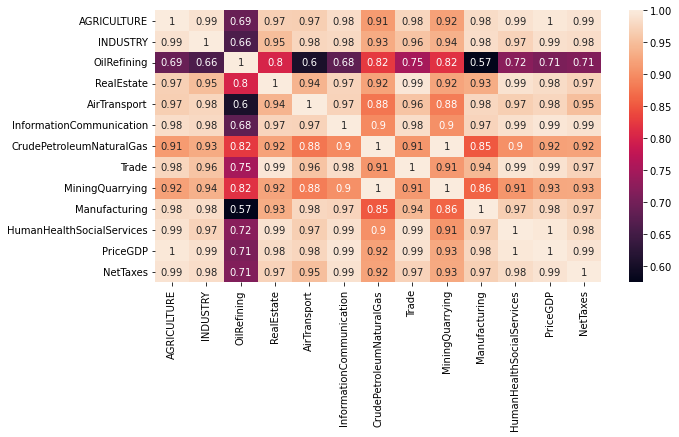

In [279]:
plt.figure(figsize = (10,5))
sns.heatmap(V2.corr(), annot = True)

In [280]:
V2['AGRIC_diff2'] = V2['AGRICULTURE'].pct_change()
V2['Industry_diff2'] = V2['INDUSTRY'].pct_change()
V2['Mining_diff2'] = V2['MiningQuarrying'].pct_change()
V2['NetTaxes_diff2'] = V2['NetTaxes'].pct_change()
V2['HumanHealth_diff2'] = V2['HumanHealthSocialServices'].pct_change()
V2['PriceGDP_diff2'] = V2['PriceGDP'].pct_change()
V2['Crude_diff2'] = V2['CrudePetroleumNaturalGas'].pct_change()
V2['Manufacturing_diff2'] = V2['Manufacturing'].pct_change()
V2['Trade_diff2'] = V2['Trade'].pct_change()
V2['AirTransport_diff2'] = V2['AirTransport'].pct_change()
V2['OilRefining_diff2'] = V2['OilRefining'].pct_change()
V2['InfoComm_diff2'] = V2['InformationCommunication'].pct_change()
V2['RealEstate_diff2'] = V2['RealEstate'].pct_change()

In [281]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=V2.index, y=V2['AGRIC_diff2'],
mode='lines', name = 'Agriculture'))
fig.add_trace(go.Scatter(x=V2.index, y=V2['HumanHealth_diff2'],
mode='lines', name = 'Healthcare'))
fig.add_trace(go.Scatter(x=V2.index, y=V2['Industry_diff2'],
mode='lines', name = 'Services'))
fig.add_trace(go.Scatter(x=V2.index, y=V2['AirTransport_diff2'],
mode='lines', name = 'AirTransport'))
fig.add_trace(go.Scatter(x=V2.index, y=V2['PriceGDP_diff2'],
mode = 'lines', name = 'ProductGDP'))
fig.add_trace(go.Scatter(x=V2.index, y=V2['Manufacturing_diff2'],
mode='lines', name = 'Manufacturing'))
fig.add_trace(go.Scatter(x=V2.index, y=V2['Trade_diff2'],
mode='lines', name = 'Trade'))
fig.add_trace(go.Scatter(x=V2.index, y=V2['RealEstate_diff2'],
mode='lines', name = 'RealEstate'))
fig.add_trace(go.Scatter(x=V2.index, y=V2['OilRefining_diff2'],
mode='lines', name = 'Oilrefining'))
fig.add_trace(go.Scatter(x=V2.index, y=V2['Mining_diff2'],
mode='lines', name = 'mining'))
fig.add_trace(go.Scatter(x=V2.index, y=V2['NetTaxes_diff2'],
mode='lines', name = 'Nettaxes'))
fig.add_trace(go.Scatter(x=V2.index, y=V2['InfoComm_diff2'],
mode='lines', name = 'InfoComm'))
fig.add_trace(go.Scatter(x=V2.index, y=V2['Crude_diff2'],
mode='lines', name = 'CrudePetNatGas'))

In [282]:
d5 = d1[d1.columns[:58]] #creating a new data set consisting of percentage change over the years in various secto

<AxesSubplot:>

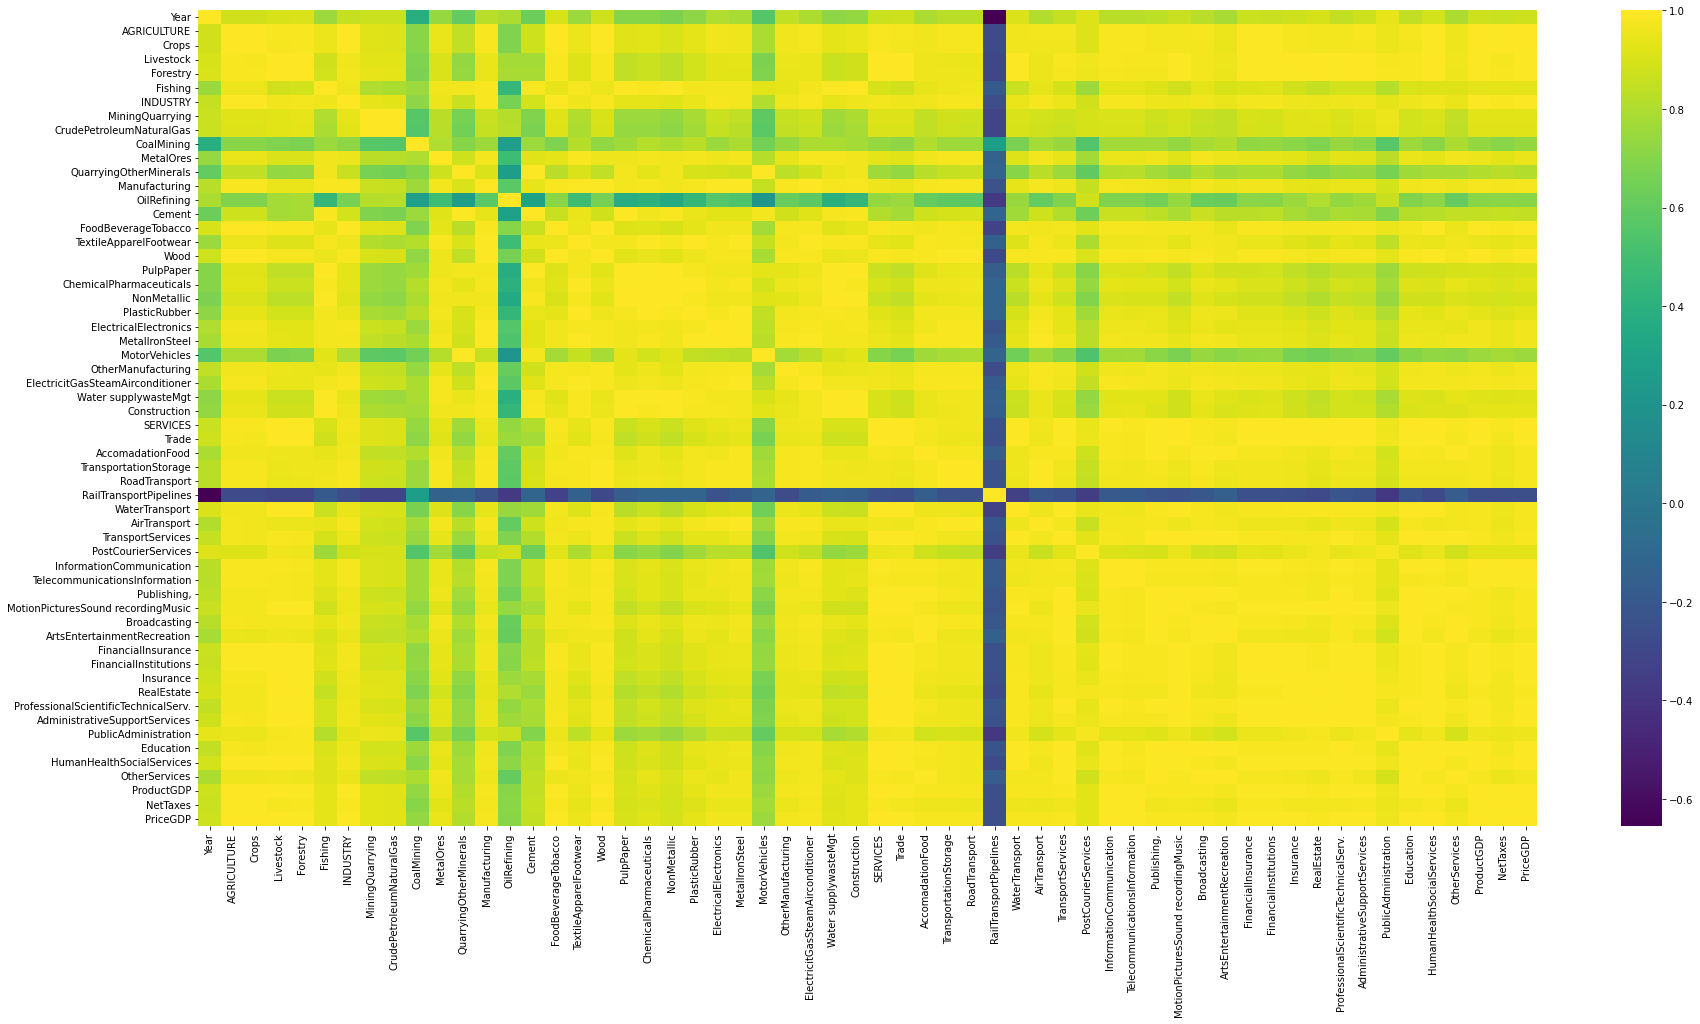

In [283]:
plt.figure(figsize = (30,15))
sns.heatmap(d5.corr(), cmap = 'viridis')
